Fixture list of England (2025 -26)

In [44]:
from pathlib import Path
import matplotlib.pyplot as plt
import sys
import seaborn as sns


root_dir = Path.cwd().parent.parent.parent.parent


In [2]:
root_dir

PosixPath('/Users/saral/Documents/cricket/cricket_gardens')

In [3]:
sys.path.append(str(root_dir))
from Analytics_app.data_cleaner import BatsmanDataCleaner

In [4]:
import pandas as pd
import numpy as np

df = pd.read_csv(root_dir /"Articles/Joe Root 16000 runs/will_root_get_to_16000/data/fixture/england_test_fixtures.csv")

In [5]:
# Root in England
df_in_en = pd.read_csv(root_dir / "Articles/Joe Root 16000 runs/will_root_get_to_16000/data/stats/root_in_england.csv")

In [6]:
# df.head()

In [7]:
root_df = pd.read_excel(root_dir / "Datasets/Player data/Batting/Root_Joe.xlsx")
tendulkar_df = pd.read_excel(root_dir / "Datasets/Player data/Batting/Tendulkar_Sachin.xlsx")
# Sachin Stats
# Tests	200	329	33	15921	248*	53.78	-	-	51	68	-	69	115	0
# tendulkar_runs = 15921
# root_runs = root_df['Runs']

In [8]:
player_dfs = {
    "Tendulkar": tendulkar_df,
    "Root": root_df
}

In [9]:
for name, df in player_dfs.items():
    cleaner = BatsmanDataCleaner(df)
    player_dfs[name] = cleaner.run_standard_pipeline()
    print(f"{name} data cleaned., shape: {player_dfs[name].shape}")

Tendulkar data cleaned., shape: (347, 17)
Root data cleaned., shape: (295, 17)


In [10]:
tendulkar_runs = player_dfs["Tendulkar"]['Runs'].sum()
root_runs = player_dfs["Root"]['Runs'].sum()

In [50]:
print(f"{tendulkar_runs} - {root_runs}: {tendulkar_runs - root_runs}")
difference = tendulkar_runs - root_runs

15921.0 - 13543.0: 2378.0


In [51]:
difference

np.float64(2378.0)

In [12]:
13543/(288-24) # innings average

51.29924242424242

In [13]:
2378 / 51.29

46.363813608890624

In [14]:
player_dfs['Root'].iloc[43]

Runs                           NaN
Mins                             -
BF                               -
4s                             NaN
6s                             NaN
SR                               -
Pos                              -
Dismissal                        -
Inns                             4
Unnamed: 9                     NaN
Opposition             West Indies
Ground                 St George's
Start Date     2015-04-21 00:00:00
Test number                   2158
100s                             0
50s                              0
NO                             NaN
Name: 43, dtype: object

In [15]:
df_years = player_dfs['Root']
df_years['Period'] = df_years['Start Date'].apply(
    lambda x: 'Before 2020' if x.year <= 2020 else 'Since 2021'
)



In [30]:
total_outs = 264

In [17]:
calculated_avg = round(df_years['Runs'].sum()/df_years['NO'].value_counts()[0],2)

In [20]:
round(calculated_avg,2)

np.float64(51.3)

In [19]:
df_years['Runs'].sum()/ (288-24)

np.float64(51.29924242424242)

In [21]:
df_years['NO'].value_counts()

NO
0.0    264
1.0     24
Name: count, dtype: int64

In [26]:
df_years.groupby("Period")['Runs'].sum()

Period
Before 2020    7823.0
Since 2021     5720.0
Name: Runs, dtype: float64

7823.0
163
Before 2020: Runs = 7823.0, Outs = 163, Overall Avg = 47.99
5720.0
101
Since 2021: Runs = 5720.0, Outs = 101, Overall Avg = 56.63
               Runs  Outs  NotOuts
Period                            
Before 2020  7823.0   163       14
Since 2021   5720.0   101       10


Text(0.5, 1.0, 'Joe Root: Average and Runs Before 2021 vs Since 2021')

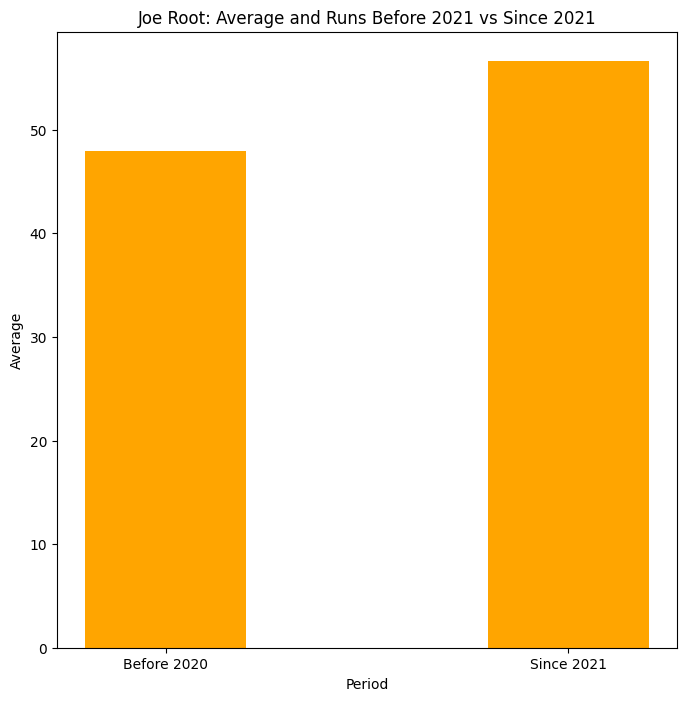

In [43]:
# df_years_no_2012 = df_years[df_years['Span'] != 2012]

df_years
for period, group in df_years.groupby("Period"):
	total_runs = group["Runs"].sum()
	print(total_runs)
	total_outs = group["NO"].value_counts()[0]
	print(total_outs)
	overall_avg = total_runs / total_outs if total_outs else float('nan')
	print(f"{period}: Runs = {total_runs}, Outs = {total_outs}, Overall Avg = {overall_avg:.2f}")
	
# plot now before 2021 and since 2021 averages and runs
# Plot averages and runs before 2021 and since 2021
period_stats = df_years.groupby('Period').agg(Runs=('Runs', 'sum'),Outs=('NO', lambda x: x.eq(0).sum()),NotOuts=('NO', lambda x: x.eq(1).sum()))
print(period_stats)
period_stats['Avg'] = period_stats['Runs'] / period_stats['Outs']

fig, ax = plt.subplots(figsize=(8, 8))
bars = ax.bar(period_stats.index, period_stats['Avg'], color='orange', width=0.4, label='Average')
ax.set_ylabel('Average')
ax.set_xlabel('Period')
ax.set_title('Joe Root: Average and Runs Before 2021 vs Since 2021')

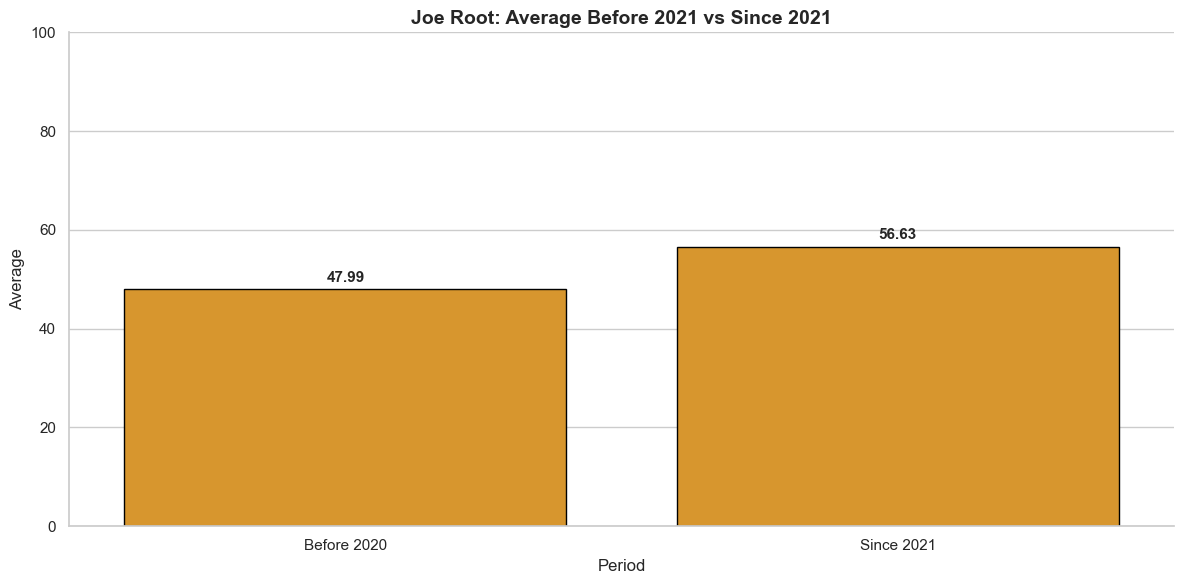

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Make sure period_stats has an index of ['Before 2021', 'Since 2021']
# and a column 'Avg' for the batting average in each period.

sns.set(style="whitegrid")

fig, ax = plt.subplots(figsize=(12, 6))

# If period_stats is indexed by Period, reset_index for seaborn
plot_df = period_stats.reset_index()

bars = sns.barplot(
    data=plot_df,
    x='Period',
    y='Avg',
    ax=ax,
    color='#f39c12',   # a nicer orange; you can tweak this
    edgecolor='black'
)

# Labels & title
ax.set_ylabel('Average', fontsize=12)
ax.set_xlabel('Period', fontsize=12)
ax.set_title('Joe Root: Average Before 2021 vs Since 2021', fontsize=14, fontweight='bold')
ax.set_ylim(0, 100)

# Annotate averages on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f"{height:.2f}",
        (p.get_x() + p.get_width() / 2, height),
        ha='center',
        va='bottom',
        fontsize=11,
        fontweight='bold',
        xytext=(0, 3),
        textcoords='offset points'
    )

# Beautify a bit
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()

# Save with transparent background
plt.savefig(
    root_dir / 'Articles/Joe Root 16000 runs/will_root_get_to_16000/output/root_avg_period.png',
    dpi=300,
    bbox_inches='tight',
    transparent=True
)

plt.show()


In [77]:
# before 2020
print("Before 2020")
print(f'Number of innings required : {difference/47.99:.2f}')
# after 2020
print("After 2020")
print(f'Number of innings required : {difference/56.63:.2f}')

Before 2020
Number of innings required : 49.55
After 2020
Number of innings required : 41.99


In [109]:
df_root_each_year = pd.read_csv(root_dir/"Articles/Joe Root 16000 runs/will_root_get_to_16000/data/stats/joe_root_years.csv")
df_tendulkar_each_year = pd.read_csv(root_dir/"Articles/Joe Root 16000 runs/will_root_get_to_16000/data/stats/tendulkar_years.csv")

In [110]:
df_root_each_year
# remove last row
df_root_each_year = df_root_each_year.iloc[:-1]

In [111]:
df_tendulkar_each_year

,Unnamed: 0,Span,Mat,Inns,NO,Runs,HS,Avg,100s,50s,0s
0,year,1989,4,6,0,215,59,35.83,0,2,0
1,year,1990,7,10,1,373,119*,41.44,1,2,1
2,year,1991,2,4,0,78,40,19.50,0,0,0
3,year,1992,7,11,1,419,148*,41.90,3,0,2
4,year,1993,8,9,2,640,165,91.42,2,5,0
5,year,1994,7,11,1,700,179,70.00,2,3,0
6,year,1995,3,4,2,58,52*,29.00,0,1,0
7,year,1996,8,15,0,623,177,41.53,2,2,1
8,year,1997,12,17,1,1000,169,62.50,4,3,0
9,year,1998,5,9,1,647,177,80.87,3,1,0


In [112]:
#conver df_root_each_year['Span'] to datetime
df_root_each_year['Span']

0     2012.0
1     2013.0
2     2014.0
3     2015.0
4     2016.0
5     2017.0
6     2018.0
7     2019.0
8     2020.0
9     2021.0
10    2022.0
11    2023.0
12    2024.0
13    2025.0
Name: Span, dtype: float64

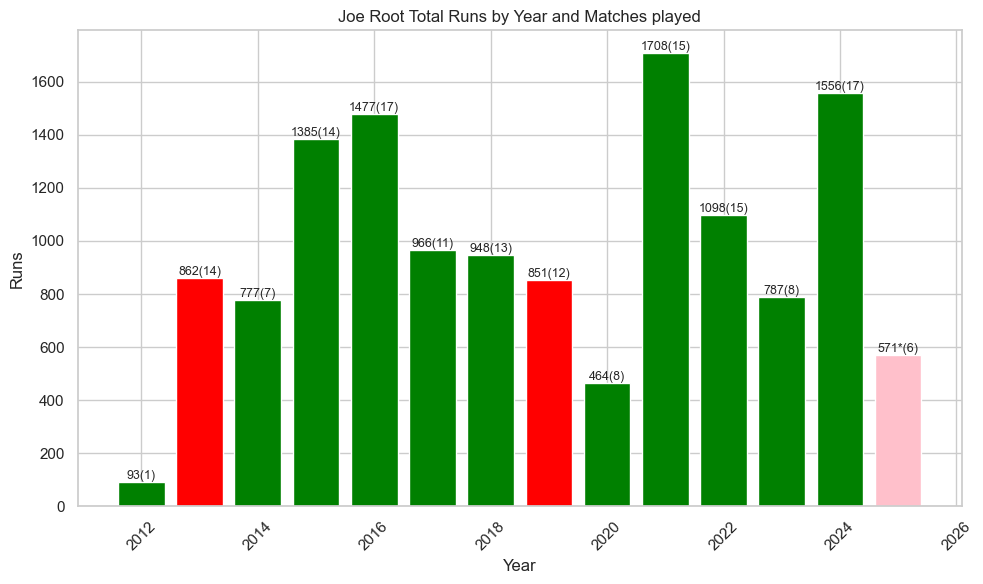

In [106]:
# graph the runs by years 
plt.figure(figsize=(10, 6))
colors = ['pink' if year == 2025 else ('green' if avg > 40 else 'red') for year, avg in zip(df_root_each_year["Span"], df_root_each_year["Avg"])]
bars = plt.bar(df_root_each_year["Span"], df_root_each_year["Runs"], color=colors)
plt.title("Joe Root Total Runs by Year and Matches played")
plt.xlabel("Year")
plt.ylabel("Runs")
plt.xticks(rotation=45)
plt.tight_layout()
# Add run values and matches on top of each bar, with * for 2025
for bar, year, run, mat in zip(bars, df_root_each_year["Span"], df_root_each_year["Runs"], df_root_each_year["Mat"]):
    label = f"{run}*({mat})" if year == 2025 else f"{run}({mat})"
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), label, ha='center', va='bottom', fontsize=9)
plt.show()

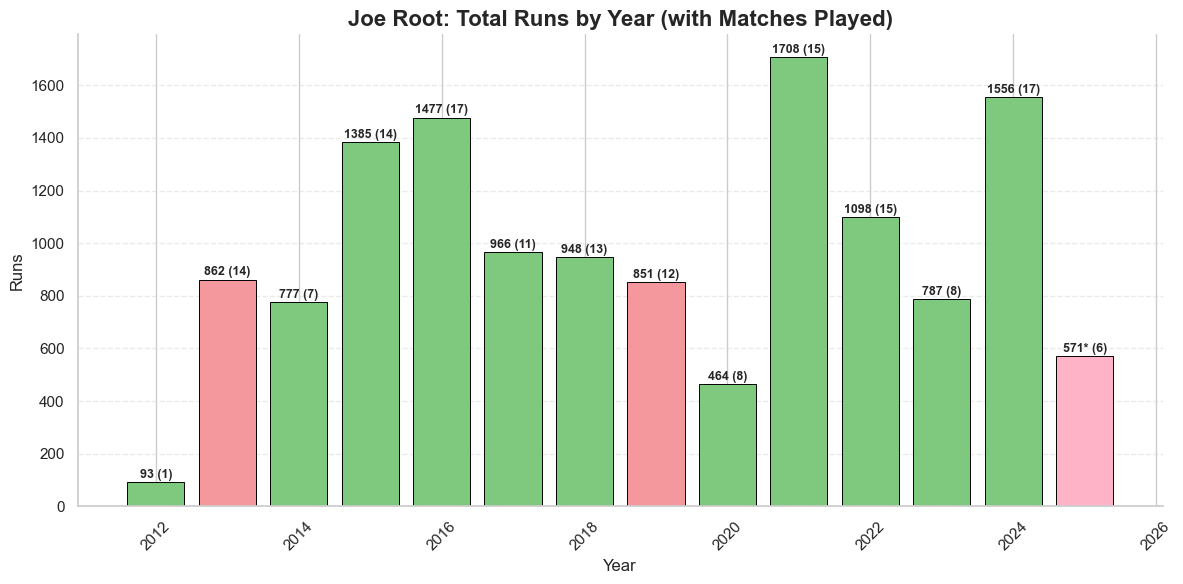

In [107]:

# Seaborn styling
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))

# Color logic (cleaner)
colors = []
for year, avg in zip(df_root_each_year["Span"], df_root_each_year["Avg"]):
    if year == 2025:
        colors.append("#ffb3c6")  # soft pink highlight
    elif avg > 40:
        colors.append("#7fc97f")  # soft green
    else:
        colors.append("#f5989d")  # soft red

# Barplot
bars = plt.bar(
    df_root_each_year["Span"],
    df_root_each_year["Runs"],
    color=colors,
    edgecolor="black",
    linewidth=0.7
)

plt.title(
    "Joe Root: Total Runs by Year (with Matches Played)",
    fontsize=16,
    fontweight='bold'
)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Runs", fontsize=12)
plt.xticks(rotation=45)

# Add subtle horizontal grid lines
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Add run values + mat on each bar
for bar, year, run, mat in zip(bars, df_root_each_year["Span"], df_root_each_year["Runs"], df_root_each_year["Mat"]):
    label = f"{run}* ({mat})" if year == 2025 else f"{run} ({mat})"
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 5,
        label,
        ha='center',
        va='bottom',
        fontsize=9,
        fontweight='semibold'
    )

# Remove top/right spines for a cleaner effect
sns.despine()

plt.tight_layout()

# Save transparent
plt.savefig(
    root_dir/'Articles/Joe Root 16000 runs/will_root_get_to_16000/output/root_by_year.png',
    dpi=300,
    transparent=True,
    bbox_inches='tight'
)

plt.show()


In [ ]:
# Group by Mat and get counts before 2020 and since 2021
df_years.groupby('Period')['Mat'].sum()



In [ ]:
97 + 61

In [ ]:
# centuries group
df_years.groupby('Period')['100s'].sum()


### Against Australia (Home and Away)

In [79]:
vs_australia = pd.read_csv(root_dir / "Articles/Joe Root 16000 runs/will_root_get_to_16000/data/stats/joe_root_country.csv")
vs_australia_away = pd.read_csv(root_dir / "Articles/Joe Root 16000 runs/will_root_get_to_16000/data/stats/joe_root_country_venue.csv")

In [80]:
vs_australia

,Unnamed: 0,Span,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100s,50s,0s,4s,6s
0,Vs Australia,2013-2023,34,65,5,2428,180,40.46,4825.0,50.32,4,18,5,270,12.0
1,Vs Bangladesh,2016-2016,2,4,0,98,56,24.50,177.0,55.36,0,1,0,9,0.0
2,Vs India,2012-2025,35,64,7,3383,218,59.35,6115.0,55.32,13,12,1,360,8.0
3,Vs Ireland,2019-2023,2,3,0,89,56,29.66,130.0,68.46,0,1,0,7,1.0
4,Vs New Zealand,2013-2024,21,40,4,1925,226,53.47,3329.0,57.82,6,9,4,213,11.0
5,Vs Pakistan,2015-2024,18,31,3,1487,262,53.10,2410.0,61.70,2,7,1,147,0.0
6,Vs South Africa,2015-2022,15,27,1,1210,190,46.53,1923.0,62.92,2,9,0,155,4.0
7,Vs Sri Lanka,2014-2024,13,24,2,1376,228,62.54,2145.0,64.14,6,2,1,125,3.0
8,Vs West Indies,2015-2024,17,29,2,1513,182*,56.03,2458.0,61.55,6,7,1,162,6.0
9,Vs Zimbabwe,2025-2025,1,1,0,34,34,34.00,44.0,77.27,0,0,0,3,0.0


In [81]:
vs_australia_away

,Unnamed: 0,Span,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100s,50s,0s,4s,6s
0,In Australia,2013-2022,14,27,2,892,89,35.68,2015.0,44.26,0,9,2,91,0.0
1,In Bangladesh,2016-2016,2,4,0,98,56,24.50,177.0,55.36,0,1,0,9,0.0
2,In England,2013-2025,84,147,15,7329,254,55.52,12302.0,59.57,24,33,6,842,20.0
3,In India,2012-2024,15,30,2,1272,218,45.42,2511.0,50.65,3,6,0,124,5.0
4,In New Zealand,2013-2024,12,22,2,1006,226,50.30,1813.0,55.48,3,5,3,101,9.0
5,In Pakistan,2022-2024,6,10,0,477,262,47.70,668.0,71.40,1,1,1,32,0.0
6,In South Africa,2015-2020,8,15,1,703,110,50.21,1156.0,60.81,1,6,0,88,3.0
7,In Sri Lanka,2018-2021,5,10,0,655,228,65.50,971.0,67.45,3,0,0,58,3.0
8,In U.A.E.,2015-2015,3,6,1,287,88,57.40,527.0,54.45,0,3,0,26,0.0
9,In West Indies,2015-2022,9,17,1,824,182*,51.50,1416.0,58.19,4,2,1,80,5.0


# In England vs Pakistan
            Span	  Mat  Inns NO	Runs HS	Ave	    BF	      SR	100	50	0	4s	6s	
filtered	2016-2020	9	15	2	723	254	55.61	1215	59.50	1	3	0	89	0	

# In England vs NewZealand
filtered	2013-2022	9	18	2	919	176	57.43	1516	60.62	3	4	1	112	2	

In [88]:
# Root career averages vs Opposition countries - overall averages
avg_australia = 40.46 # overall
avg_newzealnd = 53.47 # overall
avg_pakistan = 53.10 # overall

# Root Country specific venue  averages vs Opposition countries
avg_australia_away = 35.68 # country
avg_newzealnd_home = 57.43 # country
avg_pakistan_home = 55.61 # country

# Root stadium venue specific  average vs Opposition countries


# overall runs by overall averages
predicted_runs_aus = round(avg_australia * 10,0)
predicted_runs_nz = round(avg_newzealnd * 6,0)
predicted_runs_pak = round(avg_pakistan * 6,0)
print(predicted_runs_aus+predicted_runs_nz+predicted_runs_pak)

# overall runs by country specific averages
predicted_runs_aus_ = round(avg_australia_away * 10,0)
predicted_runs_nz_ = round(avg_newzealnd_home * 6,0)
predicted_runs_pak_ = round(avg_pakistan_home * 6,0)
print(predicted_runs_aus_ + predicted_runs_nz_ + predicted_runs_pak_)


1045.0
1036.0


In [95]:
35.68 * 10

356.8

In [93]:
print(predicted_runs_aus_, predicted_runs_pak_, predicted_runs_nz_)

357.0 334.0 345.0


In [ ]:
print(predicted_runs_aus + root_runs)
# difference from tendulkar after Ashes
print(tendulkar_runs - (predicted_runs_aus + root_runs) )

13948.0
1973.0


In [90]:
print ("After Ashes + NZ home")
print(predicted_runs_aus+ predicted_runs_nz + root_runs)
# difference from tendulkar after Ashes
print(tendulkar_runs - (predicted_runs_aus + predicted_runs_nz + root_runs) )

After Ashes + NZ home
14269.0
1652.0


In [91]:
print ("After Ashes + NZ home + Pak Home")
print(predicted_runs_aus+ predicted_runs_nz+ predicted_runs_pak + root_runs)
# difference from tendulkar after Ashes
print(tendulkar_runs - (predicted_runs_aus + predicted_runs_nz +predicted_runs_pak + root_runs) )

After Ashes + NZ home + Pak Home
14588.0
1333.0


In [92]:
print("after Ashes")
print(predicted_runs_aus_ + root_runs)
# difference from tendulkar after Ashes
print(tendulkar_runs - (predicted_runs_aus_ + root_runs) )
print ("After Ashes + NZ home")
print(predicted_runs_aus_+ predicted_runs_nz_ + root_runs)
# difference from tendulkar after Ashes
print(tendulkar_runs - (predicted_runs_aus_ + predicted_runs_nz_+ root_runs) )
print ("After Ashes + NZ home + Pak Home")
print(predicted_runs_aus_ + predicted_runs_nz_+ predicted_runs_pak_ + root_runs)
# difference from tendulkar after Ashes
print(tendulkar_runs - (predicted_runs_aus_ + predicted_runs_nz_ +predicted_runs_pak_ + root_runs) )

after Ashes
13900.0
2021.0
After Ashes + NZ home
14245.0
1676.0
After Ashes + NZ home + Pak Home
14579.0
1342.0


In [96]:
# 16 matches scchedule until 2027 April, 11 accounted for with fixtures , the next 5

5 * 51.29

256.45

In [99]:
14579 + 256 - tendulkar_runs

np.float64(-1086.0)

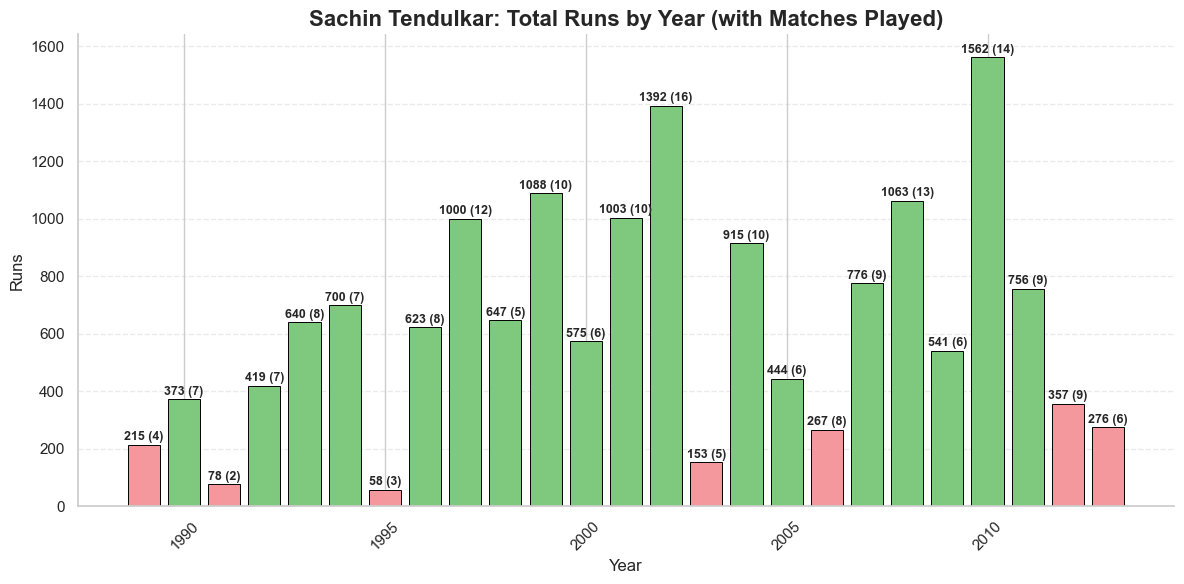

In [114]:

# Seaborn styling
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))

# Color logic (cleaner)
colors = []
for year, avg in zip(df_tendulkar_each_year["Span"], df_tendulkar_each_year["Avg"]):
    if year == 2025:
        colors.append("#ffb3c6")  # soft pink highlight
    elif avg > 40:
        colors.append("#7fc97f")  # soft green
    else:
        colors.append("#f5989d")  # soft red

# Barplot
bars = plt.bar(
    df_tendulkar_each_year["Span"],
    df_tendulkar_each_year["Runs"],
    color=colors,
    edgecolor="black",
    linewidth=0.7
)

plt.title(
    "Sachin Tendulkar: Total Runs by Year (with Matches Played)",
    fontsize=16,
    fontweight='bold'
)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Runs", fontsize=12)
plt.xticks(rotation=45)

# Add subtle horizontal grid lines
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Add run values + mat on each bar
for bar, year, run, mat in zip(bars, df_tendulkar_each_year["Span"], df_tendulkar_each_year["Runs"], df_tendulkar_each_year["Mat"]):
    label = f"{run}* ({mat})" if year == 2025 else f"{run} ({mat})"
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 5,
        label,
        ha='center',
        va='bottom',
        fontsize=9,
        fontweight='semibold'
    )

# Remove top/right spines for a cleaner effect
sns.despine()

plt.tight_layout()

# Save transparent
plt.savefig(
    root_dir/'Articles/Joe Root 16000 runs/will_root_get_to_16000/output/Tendulkar_by_year.png',
    dpi=300,
    transparent=True,
    bbox_inches='tight'
)

plt.show()


In [ ]:
# Difference from Tendulkar
# tendulkar_runs - 14587
#
# 404 + 321 + 319

# tendulkar_runs  - 14616
51.29 * 22 + 14616 - tendulkar_runs

In [ ]:
# Total root runs at the end of 2026
total_runs_2026_overall =   predicted_runs_aus + predicted_runs_nz + predicted_runs_pak
total_runs_overall = root_runs + total_runs_2026_overall

total_runs_2026_country_specific =   predicted_runs_aus_ + predicted_runs_nz_ + predicted_runs_pak_
total_runs_country_specific = root_runs + total_runs_2026_country_specific

In [ ]:
print(round(total_runs_overall), "\n ", round(total_runs_country_specific))

In [ ]:
overall_difference = tendulkar_runs - total_runs_overall
overall_difference_country_specific = tendulkar_runs - total_runs_country_specific

In [ ]:
print(overall_difference, "\n ", overall_difference_country_specific)

In [ ]:
# Drop columns where he did not bat
df_in_en = df_in_en[df_in_en['Dismissal']!='DNB']



In [ ]:
total_runs_in_england = df_in_en['Runs'].sum()
# count where dismissal is not out that is total not outs
total_not_outs = len(np.where(df_in_en['Dismissal']=='not out')[0])

# total inns without the not outs
total_inns = df_in_en.shape[0] - total_not_outs
# Average in England
average_in_england = total_runs_in_england / total_inns if total_inns > 0 else 0

In [ ]:
total_runs_in_england, total_not_outs, average_in_england

In [ ]:
# Ground specific runs and if start date is same then Ground count as 1, but does not take into
# account the number of times out


ground_stats = df_in_en.groupby('Ground').agg({'Runs': 'sum', 'Ground':'count'})
ground_stats.rename(columns={'Ground': 'Innings'}, inplace=True)
ground_stats['Average'] = ground_stats['Runs'] / ground_stats['Innings']


In [ ]:
ground_stats

In [ ]:
# First, sum runs per ground (all innings)
runs_per_ground = df_in_en.groupby('Ground')['Runs'].sum()

# Count innings where the batsman was out
outs_per_ground = df_in_en[df_in_en['Dismissal'] != 'not out'].groupby('Ground').size()

# Combine into one dataframe
ground_stats = pd.concat([runs_per_ground, outs_per_ground], axis=1)
ground_stats.columns = ['Runs', 'Outs']

# Compute average
ground_stats['Average'] = round(ground_stats['Runs'] / ground_stats['Outs'],2)

# Optional: total innings for reference
ground_stats['Innings'] = df_in_en.groupby('Ground').size()

# Not outs
ground_stats['Not Outs'] = ground_stats['Innings'] - ground_stats['Outs']
#  rearrage columns
ground_stats = ground_stats[['Runs', 'Innings', 'Outs', 'Average', 'Not Outs']]

In [ ]:
ground_stats